In [1]:
#1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [2]:
df= pd.read_csv('/content/cubic_zirconia.csv')
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [4]:
df.shape

(26967, 11)

In [5]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [6]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [7]:
df= df.drop('Unnamed: 0', axis=1)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [8]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [9]:
df.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [11]:
df.shape

(26967, 10)

In [12]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [13]:
df.duplicated().sum()

34

In [14]:
df[df.duplicated()== True]

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [15]:
df.drop_duplicates(inplace= True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(26933, 10)

In [18]:
df.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [19]:
df.skew(axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


carat    1.114789
depth   -0.026086
table    0.765805
x        0.392290
y        3.867764
z        2.580665
price    1.619116
dtype: float64

In [20]:

df.describe(include='object')

,cut,color,clarity
count,26933,26933,26933
unique,5,7,8
top,Ideal,G,SI1
freq,10805,5653,6565


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


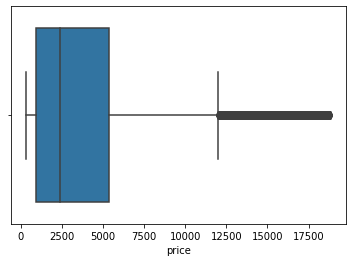

In [ ]:
sns.boxplot(df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


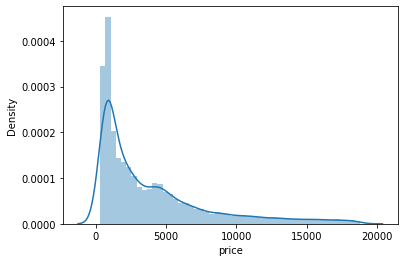

In [ ]:
sns.distplot(df['price'], kde= True)

In [ ]:
df['price'].describe()

count    26933.000000
mean      3937.526120
std       4022.551862
min        326.000000
25%        945.000000
50%       2375.000000
75%       5356.000000
max      18818.000000
Name: price, dtype: float64

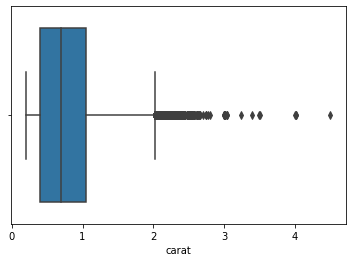

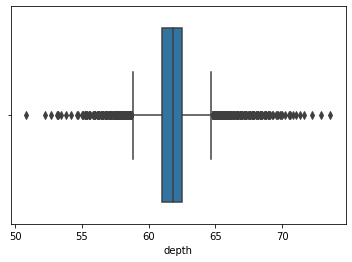

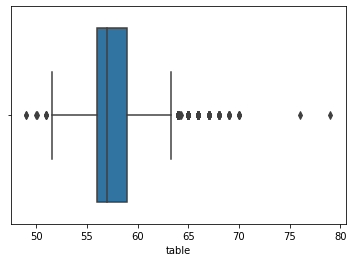

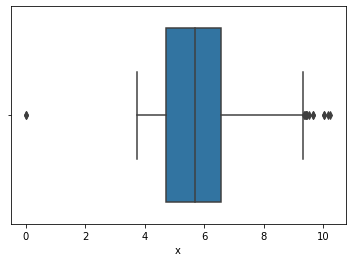

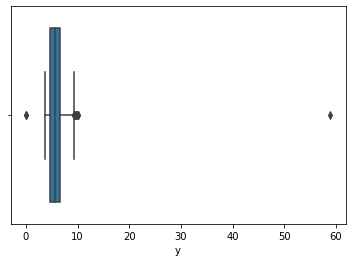

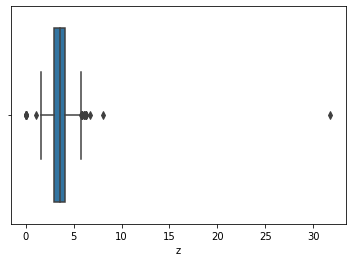

In [ ]:
for i in df:
  if df[i].dtype=='float64': 
   plt.figure
   ax=sns.boxplot(x=df[i])
   plt.show()
    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


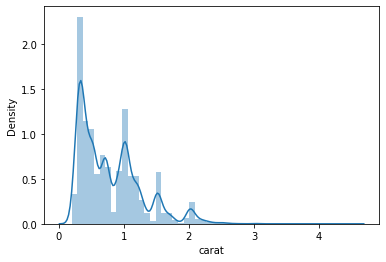

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


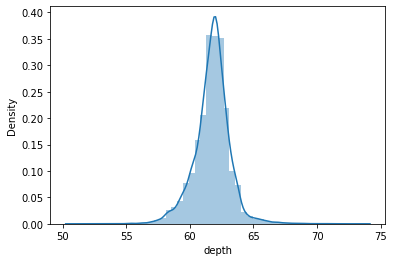

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


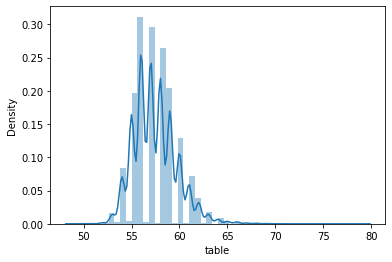

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


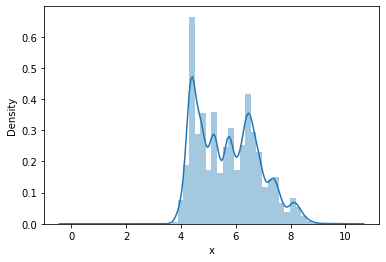

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


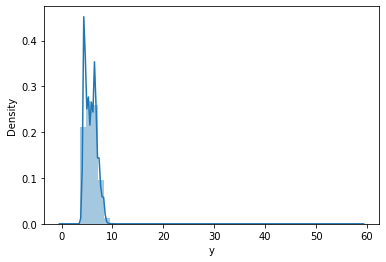

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


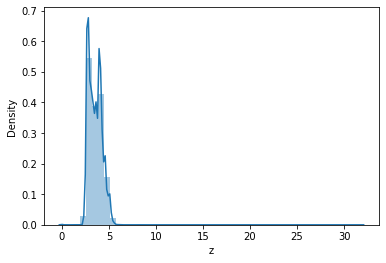

In [ ]:
for i in df:
  if df[i].dtype=='float64': 
   plt.figure
   ax=sns.distplot(df[i], kde= True);
   plt.show()

In [ ]:
for i in df:
  if df[i].dtype=='float64': 
   print("Description of" +  i)
   print('..................')
   print(df[i].describe())

Description ofcarat
..................
count    26933.000000
mean         0.798010
std          0.477237
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64
Description ofdepth
..................
count    26236.000000
mean        61.745285
std          1.412243
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64
Description oftable
..................
count    26933.000000
mean        57.455950
std          2.232156
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64
Description ofx
..................
count    26933.000000
mean         5.729346
std          1.127367
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64
Description ofy
..................
c

carat:


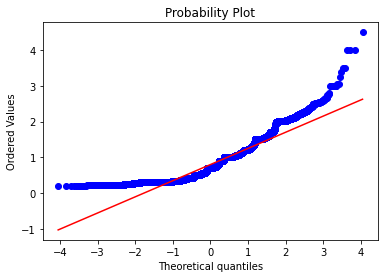

depth:


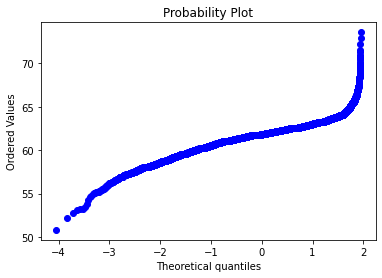

table:


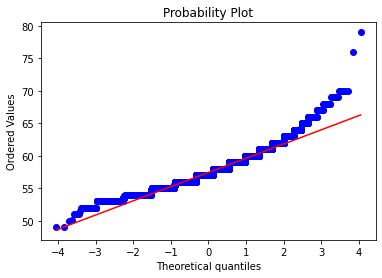

x:


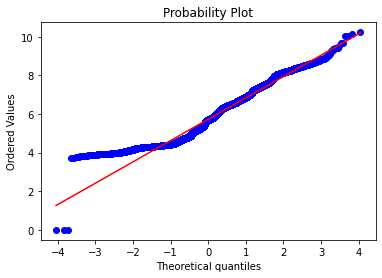

y:


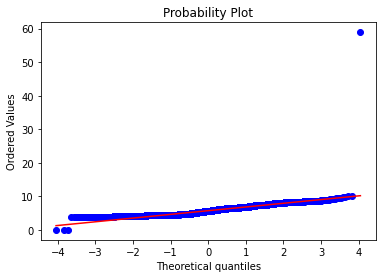

z:


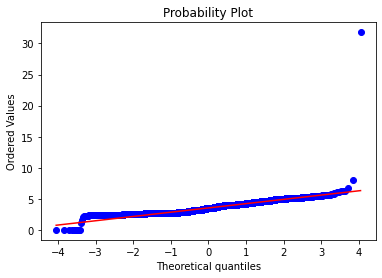

In [ ]:
for i in df:
  if df[i].dtype=='float64': 
    print(i+':')
    stats.probplot(df[i], dist='norm', plot=pylab)
    pylab.show()


In [ ]:
for i in df:
  if df[i].dtype=='object': 
   print('Description of'+ i)
   print('..................')
   print(df[i].describe())

Description ofcut
..................
count     26933
unique        5
top       Ideal
freq      10805
Name: cut, dtype: object
Description ofcolor
..................
count     26933
unique        7
top           G
freq       5653
Name: color, dtype: object
Description ofclarity
..................
count     26933
unique        8
top         SI1
freq       6565
Name: clarity, dtype: object


Description ofcut
..................


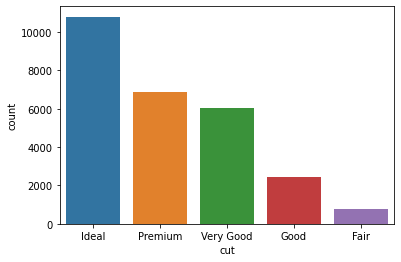

Description ofcolor
..................


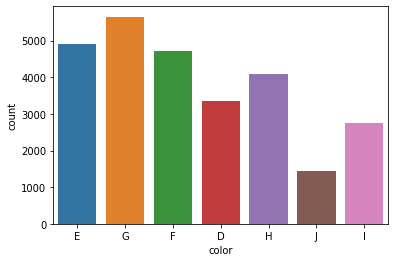

Description ofclarity
..................


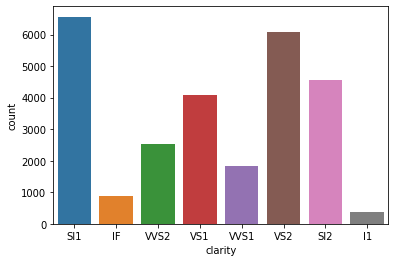

In [ ]:
for i in df:
  if df[i].dtype=='object': 
    print('Description of'+ i)
    print('..................')
    plt.figure
    ax = sns.countplot(x=df[i])
    plt.show()

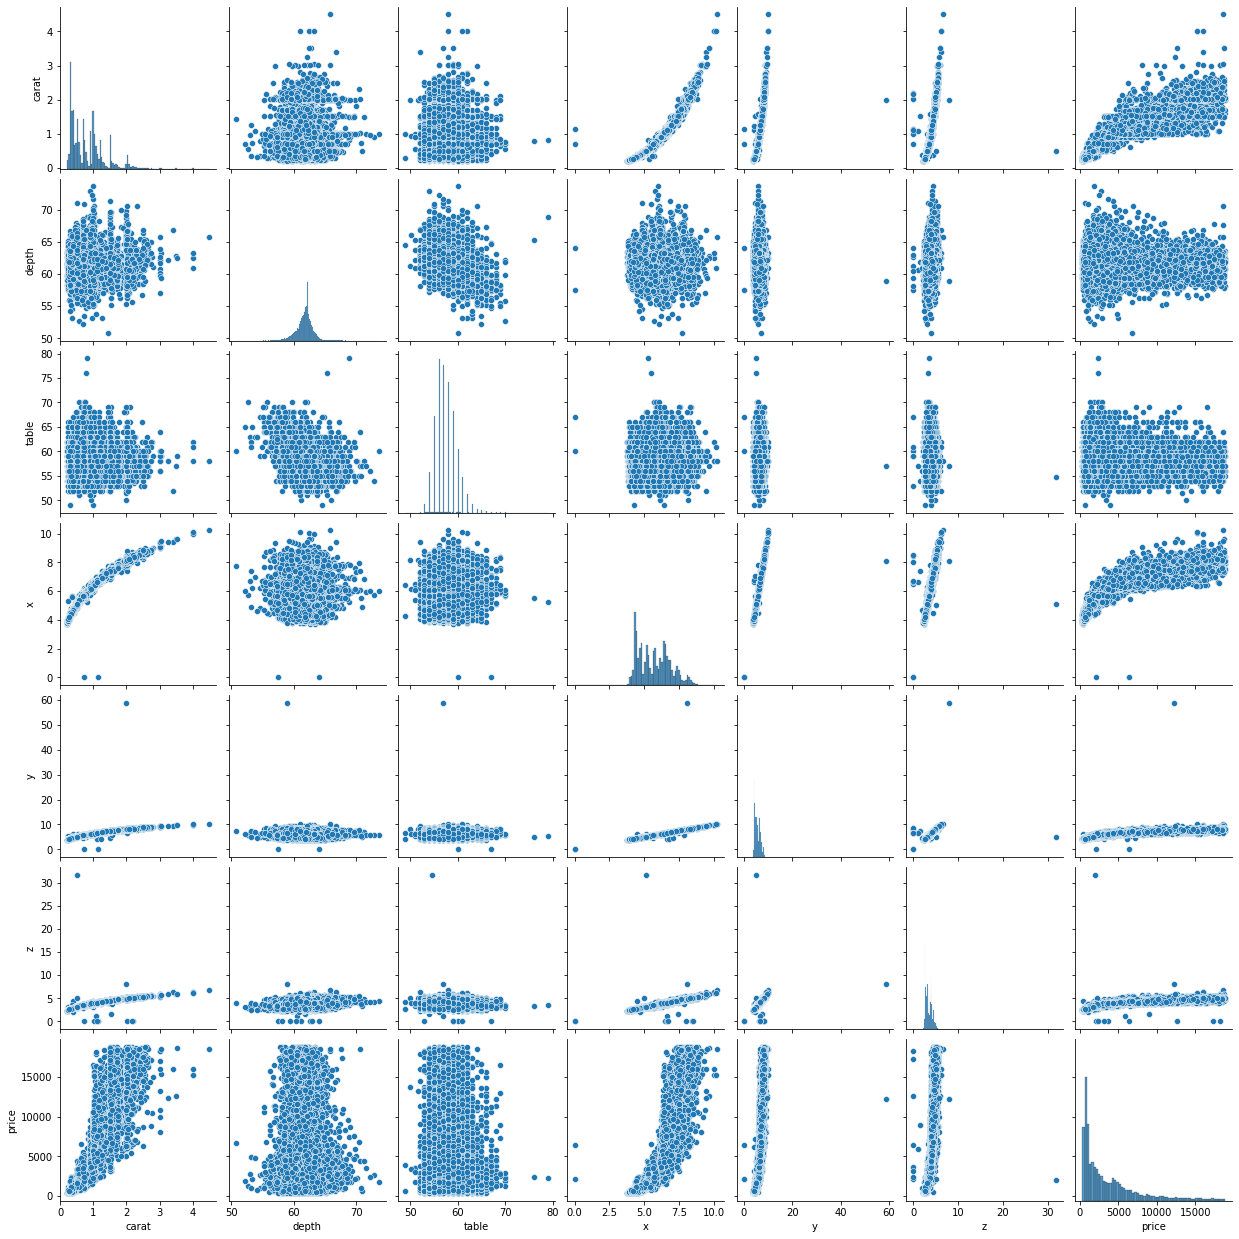

In [ ]:
sns.pairplot(df)

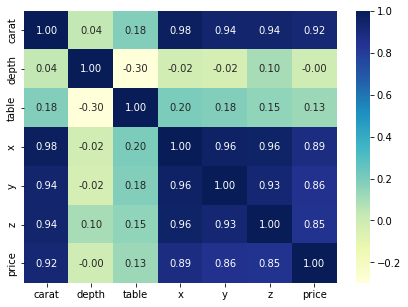

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True,fmt=".2f")

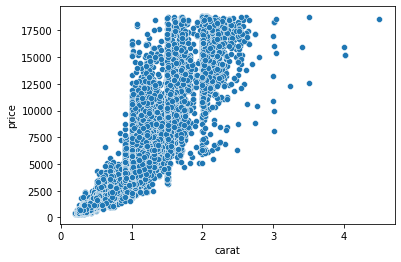

In [ ]:
sns.scatterplot(x= 'carat', y= 'price', data= df)

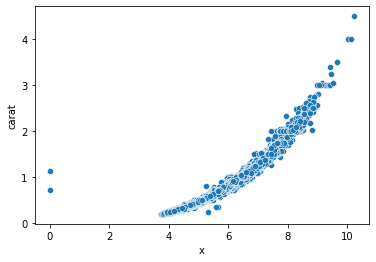

In [ ]:
sns.scatterplot(x= 'x', y= 'carat', data= df)

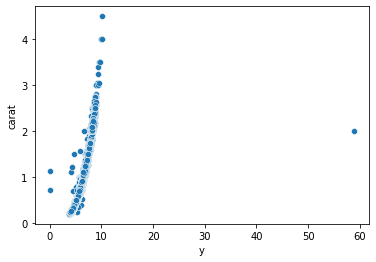

In [ ]:
sns.scatterplot(x='y', y='carat', data=df)

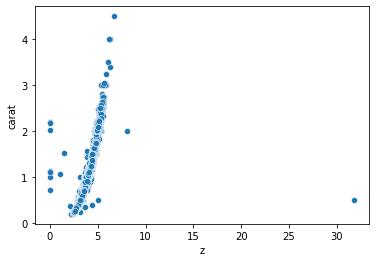

In [ ]:
sns.scatterplot(y='carat', x='z', data=df)

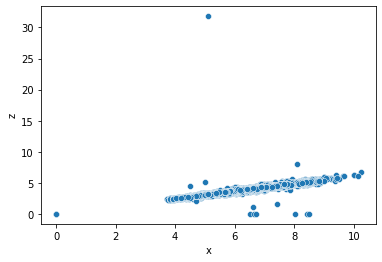

In [ ]:
sns.scatterplot(x='x', y='z', data=df)

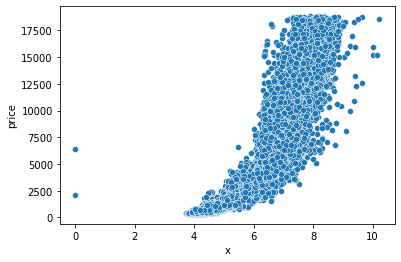

In [ ]:
sns.scatterplot(x='x', y='price', data=df)

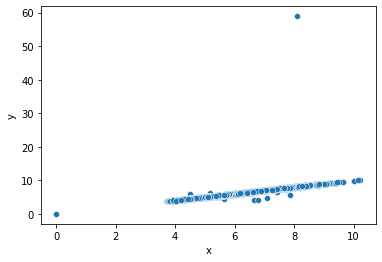

In [ ]:
sns.scatterplot(x='x', y='y', data= df)

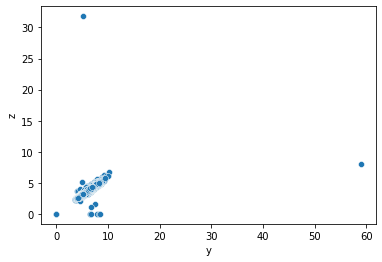

In [ ]:
sns.scatterplot(x='y', y='z', data= df)

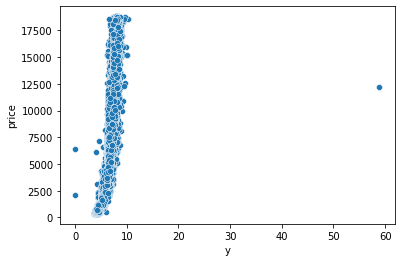

In [ ]:
sns.scatterplot(x='y', y='price', data= df)

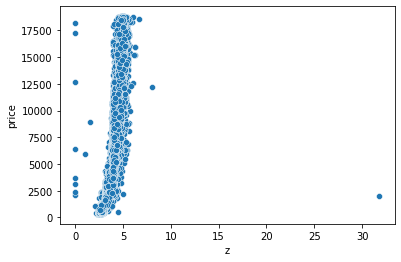

In [ ]:
sns.scatterplot(x='z', y='price', data= df)

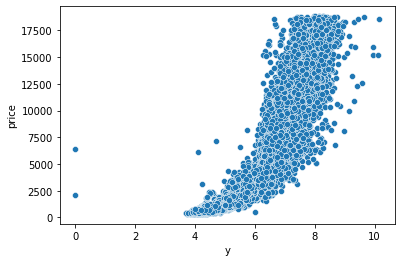

In [ ]:
sns.scatterplot(x='y', y='price', data= df[df['y']<20] )

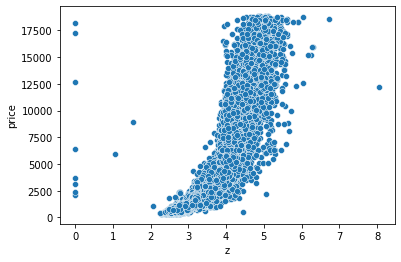

In [ ]:
sns.scatterplot(x='z', y='price', data= df[df['z']<20] )

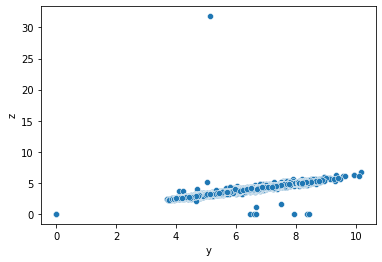

In [ ]:
sns.scatterplot(x='y', y='z', data= df[df['y']<20])

In [ ]:
df.corr()['price'].sort_values(ascending = False)

price    1.000000
carat    0.922409
x        0.886554
y        0.856441
z        0.850682
table    0.126844
depth   -0.002895
Name: price, dtype: float64

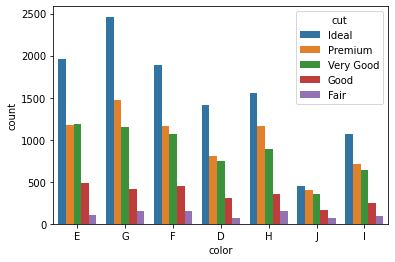

In [ ]:
sns.countplot(x='color', hue='cut', data=df)

In [ ]:
pd.crosstab(df['color'], df['cut'], margins=True)

cut,Fair,Good,Ideal,Premium,Very Good,All
color,,,,,,
D,74,311,1409,806,741,3341
E,100,490,1966,1174,1186,4916
F,148,453,1891,1164,1067,4723
G,147,418,2463,1471,1154,5653
H,149,351,1550,1159,886,4095
I,94,252,1073,707,639,2765
J,68,160,453,405,354,1440
All,780,2435,10805,6886,6027,26933


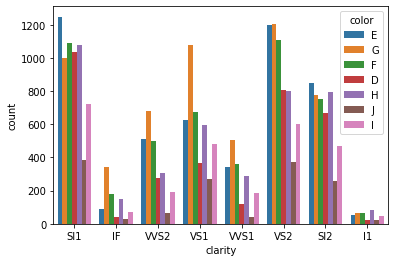

In [ ]:
sns.countplot(x='clarity', hue='color', data=df)

In [ ]:
pd.crosstab(df['clarity'], df['color'], margins=True)

color,D,E,F,G,H,I,J,All
clarity,,,,,,,,
I1,25,53,67,68,82,48,21,364
IF,38,87,182,340,149,69,26,891
SI1,1039,1249,1088,998,1081,724,386,6565
SI2,669,849,750,778,793,467,258,4564
VS1,369,625,672,1076,593,480,272,4087
VS2,804,1202,1106,1205,803,600,373,6093
VVS1,121,342,360,507,288,183,38,1839
VVS2,276,509,498,681,306,194,66,2530
All,3341,4916,4723,5653,4095,2765,1440,26933


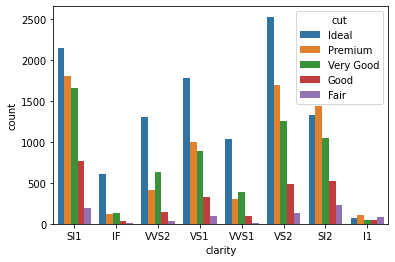

In [ ]:
sns.countplot(x='clarity', hue='cut', data=df)

In [ ]:
pd.crosstab(df['clarity'], df['cut'], margins=True)

cut,Fair,Good,Ideal,Premium,Very Good,All
clarity,,,,,,
I1,89,50,74,108,43,364
IF,4,30,610,115,132,891
SI1,193,764,2146,1809,1653,6565
SI2,224,527,1324,1443,1046,4564
VS1,93,330,1781,996,887,4087
VS2,129,491,2527,1693,1253,6093
VVS1,10,100,1036,307,386,1839
VVS2,38,143,1307,415,627,2530
All,780,2435,10805,6886,6027,26933


In [ ]:
catcol=['color','clarity', 'cut']
catcol

['color', 'clarity', 'cut']

In [ ]:
numcol= ['carat', 'depth', 'table','x','y','z', 'price']
numcol

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [ ]:
def bivarnumcat(column,nbins):
    print("Mean of carat for " + column)
    print(df.groupby(df[column])['carat'].mean(), end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Plot of carat vs " + column)
    print(".........................")
    ax = sns.boxplot(x= df[column], y='carat', data=df)
    plt.show()

Mean of carat for color
color
D    0.658515
E    0.656019
F    0.731139
G    0.770520
H    0.910464
I    1.033515
J    1.161653
Name: carat, dtype: float64 

Plot of carat vs color
.........................


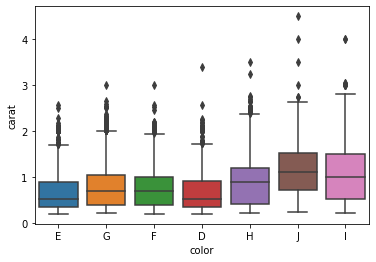

Mean of carat for clarity
clarity
I1      1.278132
IF      0.495443
SI1     0.849601
SI2     1.082358
VS1     0.726643
VS2     0.767939
VVS1    0.499929
VVS2    0.593047
Name: carat, dtype: float64 

Plot of carat vs clarity
.........................


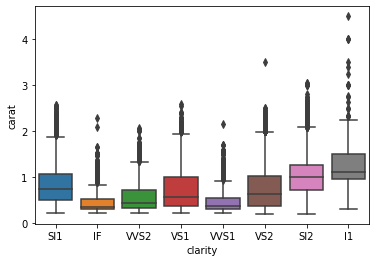

Mean of carat for cut
cut
Fair         1.062000
Good         0.848953
Ideal        0.701430
Premium      0.888360
Very Good    0.813182
Name: carat, dtype: float64 

Plot of carat vs cut
.........................


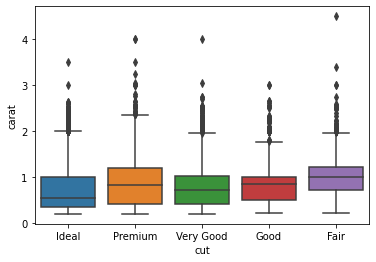

In [ ]:
for x in catcol:
    bivarnumcat(x,20)

In [ ]:
def bivarnumcat(column,nbins):
    print("Mean of depth for " + column)
    print(df.groupby(df[column])['depth'].mean(), end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Plot of depth vs " + column)
    print(".........................")
    ax = sns.boxplot(x= df[column], y='depth', data=df)
    plt.show()

Mean of depth for color
color
D    61.703553
E    61.657575
F    61.676400
G    61.744611
H    61.827937
I    61.869101
J    61.901001
Name: depth, dtype: float64 

Plot of depth vs color
.........................


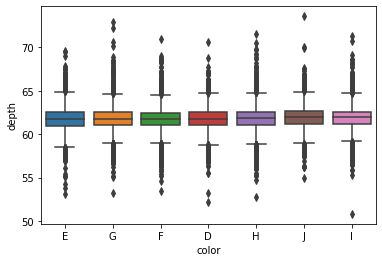

Mean of depth for clarity
clarity
I1      62.630791
IF      61.499656
SI1     61.854342
SI2     61.775293
VS1     61.661029
VS2     61.719902
VVS1    61.624344
VVS2    61.653188
Name: depth, dtype: float64 

Plot of depth vs clarity
.........................


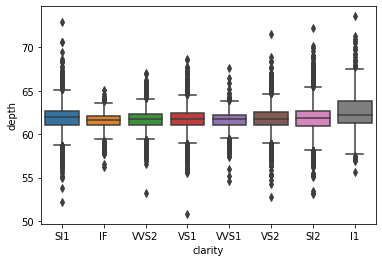

Mean of depth for cut
cut
Fair         63.944312
Good         62.373948
Ideal        61.705363
Premium      61.267598
Very Good    61.823932
Name: depth, dtype: float64 

Plot of depth vs cut
.........................


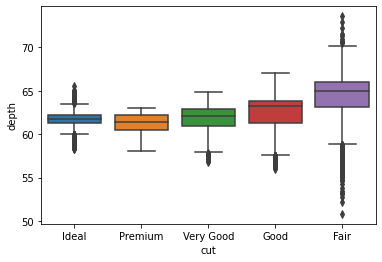

In [ ]:
for x in catcol:
    bivarnumcat(x,20)

In [ ]:
def bivarnumcat(column,nbins):
    print("Mean of table for " + column)
    print(df.groupby(df[column])['table'].mean(), end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Plot of table vs " + column)
    print(".........................")
    ax = sns.boxplot(x= df[column], y='table', data=df)
    plt.show()

Mean of table for color
color
D    57.374828
E    57.516843
F    57.439318
G    57.304617
H    57.484420
I    57.565533
J    57.793542
Name: table, dtype: float64 

Plot of table vs color
.........................


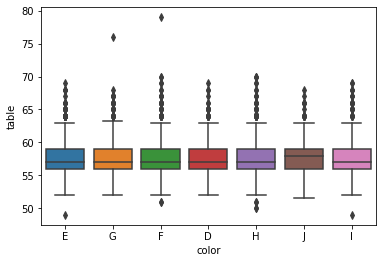

Mean of table for clarity
clarity
I1      58.376923
IF      56.449270
SI1     57.637106
SI2     57.912007
VS1     57.322021
VS2     57.429805
VVS1    56.910984
VVS2    57.060632
Name: table, dtype: float64 

Plot of table vs clarity
.........................


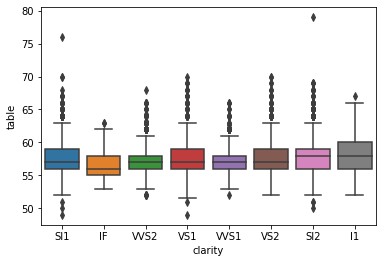

Mean of table for cut
cut
Fair         59.300513
Good         58.703860
Ideal        55.956205
Premium      58.714406
Very Good    57.963929
Name: table, dtype: float64 

Plot of table vs cut
.........................


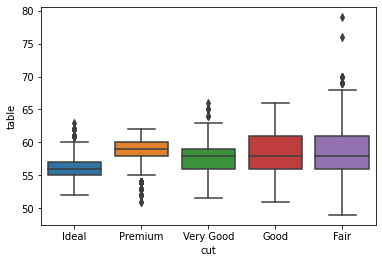

In [ ]:
for x in catcol:
    bivarnumcat(x,20)

In [ ]:
def bivarnumcat(column,nbins):
    print("Mean of x for " + column)
    print(df.groupby(df[column])['x'].mean(), end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Plot of table vs " + column)
    print(".........................")
    ax = sns.boxplot(x= df[column], y='x', data=df)
    plt.show()

Mean of x for color
color
D    5.414385
E    5.403961
F    5.598562
G    5.678289
H    5.979648
I    6.236796
J    6.514146
Name: x, dtype: float64 

Plot of table vs color
.........................


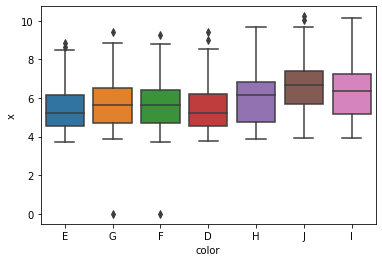

Mean of x for clarity
clarity
I1      6.758132
IF      4.943962
SI1     5.884967
SI2     6.411873
VS1     5.567127
VS2     5.665168
VVS1    4.946900
VVS2    5.208213
Name: x, dtype: float64 

Plot of table vs clarity
.........................


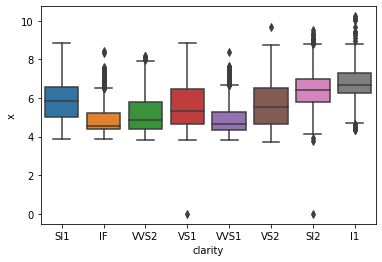

Mean of x for cut
cut
Fair         6.284244
Good         5.841326
Ideal        5.500229
Premium      5.966265
Very Good    5.752359
Name: x, dtype: float64 

Plot of table vs cut
.........................


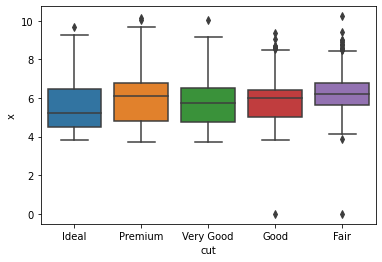

In [ ]:
for x in catcol:
    bivarnumcat(x,20)

In [ ]:
def bivarnumcat(column,nbins):
    print("Mean of y for " + column)
    print(df.groupby(df[column])['y'].mean(), end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Plot of y vs " + column)
    print(".........................")
    ax = sns.boxplot(x= df[column], y='y', data=df)
    plt.show()

Mean of y for color
color
D    5.419129
E    5.409329
F    5.602494
G    5.680258
H    5.987057
I    6.236604
J    6.513729
Name: y, dtype: float64 

Plot of y vs color
.........................


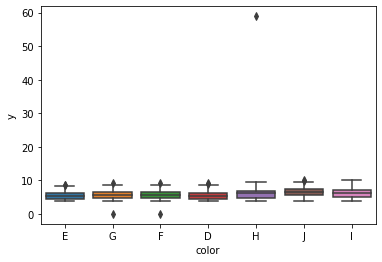

Mean of y for clarity
clarity
I1      6.708379
IF      4.965230
SI1     5.885100
SI2     6.413149
VS1     5.572190
VS2     5.666368
VVS1    4.962501
VVS2    5.222810
Name: y, dtype: float64 

Plot of y vs clarity
.........................


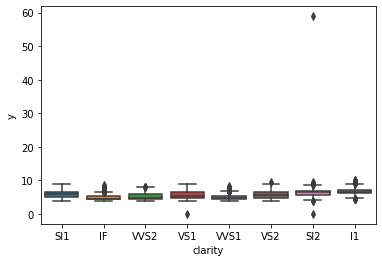

Mean of y for cut
cut
Fair         6.216179
Good         5.856033
Ideal        5.511296
Premium      5.940520
Very Good    5.781583
Name: y, dtype: float64 

Plot of y vs cut
.........................


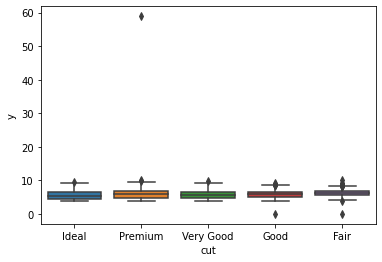

In [ ]:
for x in catcol:
    bivarnumcat(x,20)

In [ ]:
def bivarnumcat(column,nbins):
    print("Mean of z for " + column)
    print(df.groupby(df[column])['z'].mean(), end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Plot of z vs " + column)
    print(".........................")
    ax = sns.boxplot(x= df[column], y='z', data=df)
    plt.show()

Mean of z for color
color
D    3.341152
E    3.338973
F    3.453242
G    3.505128
H    3.691353
I    3.855732
J    4.030708
Name: z, dtype: float64 

Plot of z vs color
.........................


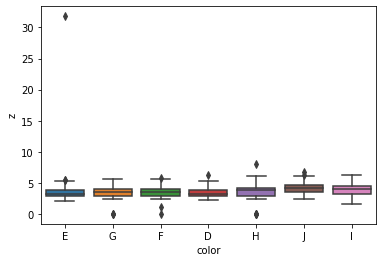

Mean of z for clarity
clarity
I1      4.194313
IF      3.045567
SI1     3.637467
SI2     3.955703
VS1     3.440763
VS2     3.495383
VVS1    3.053861
VVS2    3.214542
Name: z, dtype: float64 

Plot of z vs clarity
.........................


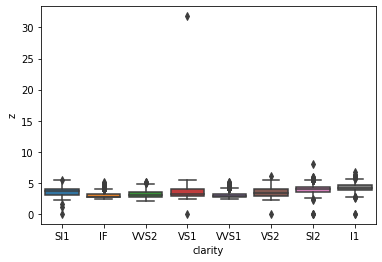

Mean of z for cut
cut
Fair         3.993013
Good         3.644678
Ideal        3.396558
Premium      3.642084
Very Good    3.569637
Name: z, dtype: float64 

Plot of z vs cut
.........................


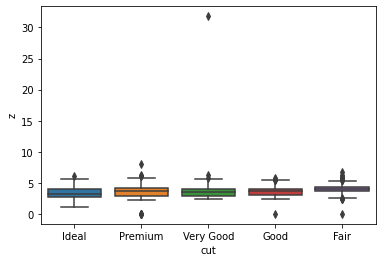

In [ ]:
for x in catcol:
    bivarnumcat(x,20)

In [ ]:
def bivarnumcat(column,nbins):
    print("Mean of price for " + column)
    print(df.groupby(df[column])['price'].mean(), end=' ')
    print('')
    print('')
       
    
    plt.figure()
    print("Plot of price vs " + column)
    print(".........................")
    ax = sns.boxplot(x= df[column], y='price', data=df)
    plt.show()

Mean of price for color
color
D    3184.827597
E    3073.940399
F    3699.944527
G    4005.046170
H    4477.932112
I    5124.816637
J    5329.706250
Name: price, dtype: float64 

Plot of price vs color
.........................


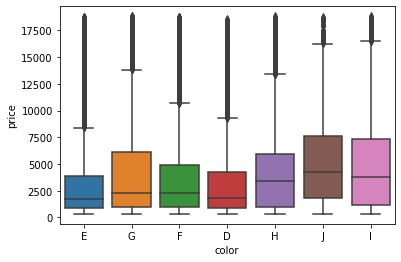

Mean of price for clarity
clarity
I1      3908.750000
IF      2739.534231
SI1     3998.635644
SI2     5088.869413
VS1     3838.752386
VS2     3965.496964
VVS1    2502.874388
VVS2    3263.042688
Name: price, dtype: float64 

Plot of price vs clarity
.........................


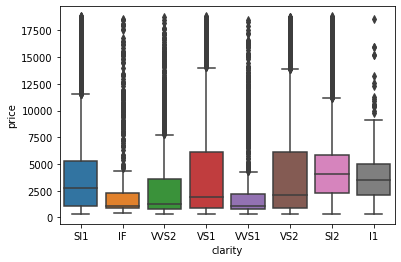

Mean of price for cut
cut
Fair         4568.096154
Good         3926.336756
Ideal        3454.820639
Premium      4544.558525
Very Good    4032.267961
Name: price, dtype: float64 

Plot of price vs cut
.........................


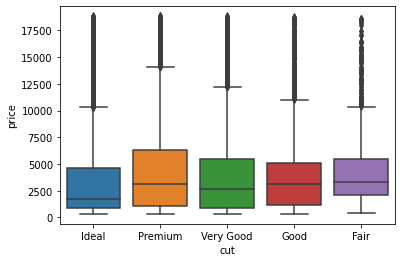

In [ ]:
for x in catcol:
    bivarnumcat(x,20)

In [ ]:
#2 
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [ ]:
df['depth'].describe() # mean= median shows a normal distribution

count    26236.000000
mean        61.745285
std          1.412243
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

In [ ]:
df.fillna(df['depth'].mean(), inplace = True)
df.isnull().sum() #Nan vlaue imputed

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [ ]:
# presence of 0 values
df.describe().min()

carat      0.200000
depth      1.393848
table      2.232156
x          0.000000
y          0.000000
z          0.000000
price    326.000000
dtype: float64

In [ ]:
  for i in df:
    if df[i].dtypes== 'object':
     print(i + ':')
     print(df[i].unique())
     print('')

cut:
['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']

color:
['E' 'G' 'F' 'D' 'H' 'J' 'I']

clarity:
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']



In [21]:
df[(df.x == 0) | (df.y == 0) | (df.z ==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [22]:
df[(df.x == 0) & (df.y == 0) & (df.z ==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [23]:
df[(df.x == 0) | (df.y == 0) | (df.z ==0)].z.count()

8

In [24]:
df.drop(df[(df.x == 0) | (df.y == 0) | (df.z ==0)].index,inplace=True)
df.describe().T['min']


carat      0.20
depth     50.80
table     49.00
x          3.73
y          3.71
z          1.07
price    326.00
Name: min, dtype: float64

In [31]:
df.shape

(26925, 10)

In [32]:
co_ov= df.copy()

In [34]:
co_ov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26228 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [38]:
co_ov['cut'].replace(['Ideal', 'Premium','Very Good', 'Good', 'Fair'], ['Ideal', 'Premium','Premium','Good', 'Fair'], inplace= True)

In [42]:
co_ov['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Fair'], dtype=object)

In [26]:
df1= df.copy()

In [27]:
df1['cut'].replace(['Ideal', 'Premium','Very Good', 'Good', 'Fair'], [4,3,2,1,0], inplace= True)

df1['color'].replace(['J','I','H','G','F','E','D'], [6,5,4,3,2,1,0], inplace= True)

df1['clarity'].replace(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], [0,1,2,3,4,5,6,7], inplace= True)

In [ ]:
df1['clarity'].unique()

array([5, 0, 2, 3, 1, 4, 6, 7])

In [ ]:
df1['cut'].value_counts(ascending= False)

4    10805
3     6880
2     6027
1     2434
0      779
Name: cut, dtype: int64

In [ ]:
df1.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [ ]:
df1.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.139908,0.293760,0.354786,0.035070,0.181511,0.977908,0.942378,0.946774,0.922400
cut,-0.139908,1.000000,-0.026809,-0.183331,-0.212275,-0.443049,-0.132945,-0.127480,-0.154347,-0.059806
color,0.293760,-0.026809,1.000000,-0.021455,0.050326,0.024074,0.274167,0.264320,0.268931,0.172710
clarity,0.354786,-0.183331,-0.021455,1.000000,0.068178,0.156511,0.376204,0.358340,0.367394,0.150683
depth,0.035070,-0.212275,0.050326,0.068178,1.000000,-0.293363,-0.018208,-0.024217,0.097061,-0.002698
table,0.181511,-0.443049,0.024074,0.156511,-0.293363,1.000000,0.197517,0.183545,0.151034,0.126967
x,0.977908,-0.132945,0.274167,0.376204,-0.018208,0.197517,1.000000,0.962510,0.961010,0.887467
y,0.942378,-0.127480,0.264320,0.358340,-0.024217,0.183545,0.962510,1.000000,0.932974,0.857255
z,0.946774,-0.154347,0.268931,0.367394,0.097061,0.151034,0.961010,0.932974,1.000000,0.855775
price,0.922400,-0.059806,0.172710,0.150683,-0.002698,0.126967,0.887467,0.857255,0.855775,1.000000


In [ ]:
df2= df1.copy()


In [ ]:
df2['cut'].replace([4, 3,2,1,0], [3,3,2,1,1], inplace= True)

In [ ]:
df2.cut.value_counts()

3    17685
2     6027
1     3213
Name: cut, dtype: int64

In [ ]:
# presence of 0 values
df.describe().min()

carat      0.200000
depth      1.393430
table      2.231327
x          1.126081
y          1.163820
z          0.717483
price    326.000000
dtype: float64

In [ ]:
  for i in df:
    if df[i].dtypes== 'object':
     print(i + ':')
     print(df[i].unique())
     print('')

cut:
['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']

color:
['E' 'G' 'F' 'D' 'H' 'J' 'I']

clarity:
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']



In [ ]:
# 3
#MODEL 1
# Treating Outliers
df3= df.copy()


In [ ]:
df3.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [ ]:
numcol2 = numcol.copy()
numcol2.remove('price')

In [ ]:
Lower_outlier = []
Upper_outlier = []
for i in range(0,6):
    Q1 = df3[numcol2[i]].quantile(0.25)
    Q3 = df3[numcol2[i]].quantile(0.75)
    IQR = Q3 - Q1
    Lower_outlier.append(df3[df3[numcol2[i]] < (Q1 - 1.5*IQR)].count()[0])
    Upper_outlier.append(df3[df3[numcol2[i]] > (Q3 + 1.5*IQR)].count()[0])

outliers = pd.DataFrame(data = Lower_outlier, columns =['Lower Outliers Count'], index = numcol2)
outliers['Lower Outliers Percentage'] =  round(outliers['Lower Outliers Count'].apply(lambda x: x*100/len(df3)),2)
outliers['Upper Outliers Count'] = Upper_outlier
outliers['Upper outliers Percentage'] = round(outliers['Upper Outliers Count'].apply(lambda x: x*100/len(df3)),2)
outliers['Total Outliers Count'] = outliers['Lower Outliers Count'] + outliers['Upper Outliers Count']
outliers['Total Outliers Percentage'] = round(outliers['Total Outliers Count'].apply(lambda x: x*100/len(df3)),2)

outliers

,Lower Outliers Count,Lower Outliers Percentage,Upper Outliers Count,Upper outliers Percentage,Total Outliers Count,Total Outliers Percentage
carat,0,0.00,655,2.43,655,2.43
depth,895,3.32,516,1.92,1411,5.24
table,8,0.03,309,1.15,317,1.18
x,0,0.00,12,0.04,12,0.04
y,0,0.00,12,0.04,12,0.04
z,1,0.00,13,0.05,14,0.05


In [ ]:
df3_no_outlier = df3[numcol2].copy()

Q1 = df3_no_outlier.quantile(0.25)
Q3 = df3_no_outlier.quantile(0.75)
IQR = Q3 - Q1



# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(df3_no_outlier[numcol2] < Q1 - 1.5 * IQR)[0], 
                np.where(df3_no_outlier[numcol2] < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df3_no_outlier.iloc[i,j] = whisker[j]
    
    
# Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(df3_no_outlier[numcol2] > Q3 + 1.5 * IQR)[0], 
                np.where(df3_no_outlier[numcol2] > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df3_no_outlier.iloc[i,j] = whisker[j]

In [ ]:
Lower_outlier = []
Upper_outlier = []
for i in numcol2:
    Q1 = df3_no_outlier[i].quantile(0.25)
    Q3 = df3_no_outlier[i].quantile(0.75)
    IQR = Q3 - Q1
    Lower_outlier.append(df3_no_outlier[df3_no_outlier[i] < (Q1 - 1.5*IQR)].count()[0])
    Upper_outlier.append(df3_no_outlier[df3_no_outlier[i] > (Q3 + 1.5*IQR)].count()[0])

outliers = pd.DataFrame(data = Lower_outlier, columns =['Lower Outliers Count'], index = numcol2)
outliers['Upper Outliers Count'] = Upper_outlier
outliers['Total Outliers Count'] = outliers['Lower Outliers Count'] + outliers['Upper Outliers Count']

outliers

,Lower Outliers Count,Upper Outliers Count,Total Outliers Count
carat,0,0,0
depth,0,0,0
table,0,0,0
x,0,0,0
y,0,0,0
z,0,0,0


In [ ]:
for i in numcol2:
    df3[i] = df3_no_outlier[i]

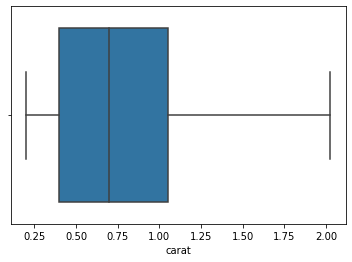

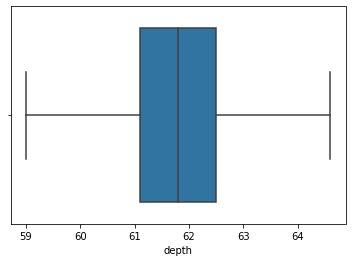

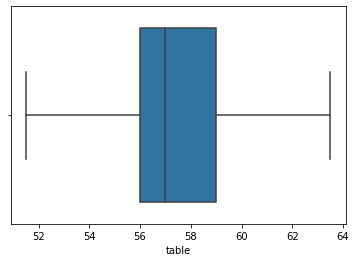

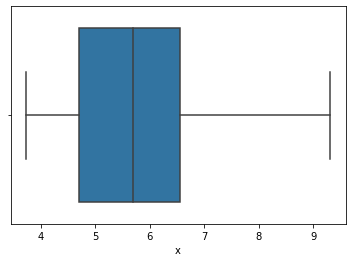

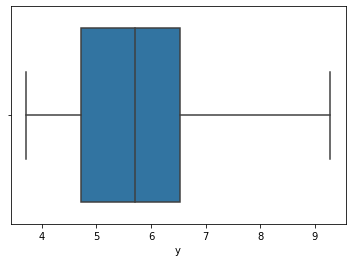

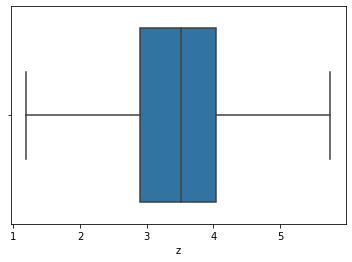

In [ ]:
for i in df3:
  if df3[i].dtype=='float64': 
   plt.figure
   ax=sns.boxplot(x=df3[i])
   plt.show()

In [ ]:
df3['cut'].replace(['Ideal', 'Premium','Very Good', 'Good', 'Fair'], [4,3,2,1,0], inplace= True)

df3['color'].replace(['J','I','H','G','F','E','D'], [6,5,4,3,2,1,0], inplace= True)

df3['clarity'].replace(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], [0,1,2,3,4,5,6,7], inplace= True)

In [ ]:
df3.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df3.drop('price', axis=1)
y=df3[['price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total observations is', X_train.shape[0]+X_test.shape[0])

X_train (18847, 9)
X_test (8078, 9)
y_train (18847, 1)
y_test (8078, 1)
Total observations is 26925


In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 13793.657377580003
The coefficient for cut is 130.83325824905592
The coefficient for color is -327.34506890190187
The coefficient for clarity is -480.1244679092567
The coefficient for depth is -10.211835289818627
The coefficient for table is -33.632630968189744
The coefficient for x is -2473.5489158514106
The coefficient for y is 1550.4374722591467
The coefficient for z is -1677.6339859356844


In [ ]:
intercept= regression_model.intercept_

In [ ]:
print("The intercept for our model is {}".format(intercept))

The intercept for our model is [9145.75700141]


In [ ]:
regression_model.score(X_train, y_train)

0.9166082456611514

In [ ]:
regression_model.score(X_test, y_test)

0.9185102292884576

In [ ]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1,1,6,63.3,56.0,6.53,6.58,4.15,4065
12108,1.01,2,0,6,64.0,56.0,6.30,6.38,4.06,5166
20181,0.67,1,5,4,60.7,61.4,5.60,5.64,3.41,1708
4712,0.76,1,3,5,59.0,63.0,6.05,5.97,3.47,2447
2548,1.01,3,3,3,62.8,59.0,6.37,6.34,3.99,6618


In [ ]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + cut + color + clarity + depth + table + x + y + z', data = data_train).fit()
lm1.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept     9145.757001
carat        13793.657378
cut            130.833258
color         -327.345069
clarity       -480.124468
depth          -10.211835
table          -33.632631
x            -2473.548916
y             1550.437472
z            -1677.633986
dtype: float64

In [ ]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.301e+04
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        15:24:41   Log-Likelihood:            -1.5969e+05
No. Observations:               18847   AIC:                         3.194e+05
Df Residuals:                   18837   BIC:                         3.195e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9145.7570   1017.388      8.989      0.0

In [ ]:
# p value of depth shows there is no relation between the independent variable with dependent variable
# fail to reject the null hypothesis
#depth is the poor predictor 

In [ ]:
y_pred = regression_model.predict(X_test)

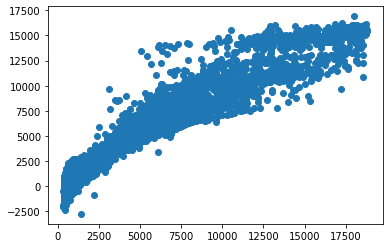

In [ ]:
plt.scatter(y_test['price'], y_pred)

In [ ]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
import math

math.sqrt(mse)

1156.3186565136912

In [ ]:
#MODEL 2 Outlier Treatment+ Scaled Data
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [ ]:
rmz = LinearRegression()
rmz.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [ ]:
intercept = rmz.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -7.860346483317047e-16


In [ ]:
rmz.score(X_test_scaled, y_test_scaled)

0.9184422018114045

In [ ]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 13793.657377580003
The coefficient for cut is 130.83325824905592
The coefficient for color is -327.34506890190187
The coefficient for clarity is -480.1244679092567
The coefficient for depth is -10.211835289818627
The coefficient for table is -33.632630968189744
The coefficient for x is -2473.5489158514106
The coefficient for y is 1550.4374722591467
The coefficient for z is -1677.6339859356844


In [ ]:
mse = np.mean((rmz.predict(X_test_scaled)-y_test_scaled)**2)
import math

math.sqrt(mse)

0.2855832596434803

In [ ]:
dt3 = pd.concat([X_train_scaled, y_train_scaled], axis=1)
dt3.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,0.668077,-1.716974,-0.942034,1.243104,1.270307,-0.660885,0.713451,0.760994,0.883039,0.033961
12108,0.472372,-0.818090,-1.528825,1.243104,1.844501,-0.660885,0.508309,0.581385,0.753145,0.308658
20181,-0.266960,-1.716974,1.405128,0.030183,-0.862416,1.843240,-0.116038,-0.083170,-0.184973,-0.554103
4712,-0.071254,-1.716974,0.231547,0.636644,-2.256888,2.585202,0.285328,0.213186,-0.098378,-0.369725
2548,0.472372,0.080793,0.231547,-0.576277,0.860168,0.730295,0.570743,0.545463,0.652117,0.670927


In [ ]:
lmz = smf.ols(formula= 'price ~ carat + cut + color + clarity + depth + table + x + y + z', data = dt3).fit()
print(lmz.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.301e+04
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        15:24:41   Log-Likelihood:                -3332.8
No. Observations:               18847   AIC:                             6686.
Df Residuals:                   18837   BIC:                             6764.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.988e-17      0.002  -9.45e-15      1.0

In [ ]:
#MODEL 3 - Ordinal Value Combined
df5= df3.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


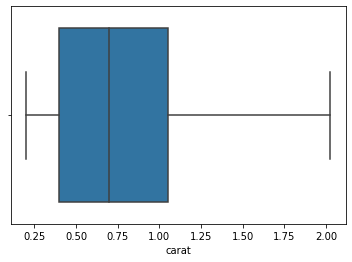

In [ ]:
sns.boxplot(df5['carat']) #no outliers present

In [ ]:
df5['cut'].unique()

array([4, 3, 2, 1, 0])

In [ ]:
df5['cut'].replace([4, 3,2,1,0], [3,3,2,1,1], inplace= True)

In [ ]:
X_df5= df5.drop('price', axis=1)
y_df5= df5[['price']]

In [ ]:
X_df5_train, X_df5_test, y_train, y_test= train_test_split(X_df5, y_df5, test_size= 0.30, random_state=1)

In [ ]:
lrm= LinearRegression()
lrm.fit(X_df5_train, y_train)

LinearRegression()

In [ ]:
intercept = lrm.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 9262.100998272232


In [ ]:
lrm.score(X_df5_test, y_test)

0.9184638307895565

In [ ]:
mse = np.mean((lrm.predict(X_df5_test)-y_test)**2)

math.sqrt(mse)

1156.6478009856123

In [ ]:
dt4= pd.concat([X_df5_train, y_train], axis=1)
dt4.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1,1,6,63.3,56.0,6.53,6.58,4.15,4065
12108,1.01,2,0,6,64.0,56.0,6.30,6.38,4.06,5166
20181,0.67,1,5,4,60.7,61.4,5.60,5.64,3.41,1708
4712,0.76,1,3,5,59.0,63.0,6.05,5.97,3.47,2447
2548,1.01,3,3,3,62.8,59.0,6.37,6.34,3.99,6618


In [ ]:
lmy = smf.ols(formula= 'price ~ carat + cut + color + clarity + depth + table + x + y + z', data = dt4).fit()
print(lmy.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.300e+04
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        15:24:42   Log-Likelihood:            -1.5969e+05
No. Observations:               18847   AIC:                         3.194e+05
Df Residuals:                   18837   BIC:                         3.195e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9262.1010   1017.080      9.107      0.0

In [ ]:
#model 4 # Outlier Treatment with droping the depth Value
df6= df3.copy() #droping the depth since it has higher p- value
df6.drop('depth', axis=1, inplace=True)

In [ ]:
df6.head(1)

,carat,cut,color,clarity,table,x,y,z,price
0,0.3,4,1,5,58.0,4.27,4.29,2.66,499


In [ ]:
Xdf6= df6.drop('price',axis=1)
ydf6=df6[['price']]

In [ ]:
X_tr,X_te,y_tr,y_te= train_test_split(Xdf6, ydf6, test_size=0.30, random_state= 1)

In [ ]:
lrm2= LinearRegression()
lrm2.fit(X_tr, y_tr)

LinearRegression()

In [ ]:
intercept = lrm2.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 8453.35713657855


In [ ]:
intercept = lrm2.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 8453.35713657855


In [ ]:
lrm2.score(X_te,y_te)

0.9185376709362842

In [ ]:
mse = np.mean((lrm2.predict(X_te)-y_te)**2)

math.sqrt(mse)

1156.1239451965835

In [ ]:
dt5= pd.concat([X_tr, y_tr], axis=1)
dt5.head()

,carat,cut,color,clarity,table,x,y,z,price
5030,1.10,1,1,6,56.0,6.53,6.58,4.15,4065
12108,1.01,2,0,6,56.0,6.30,6.38,4.06,5166
20181,0.67,1,5,4,61.4,5.60,5.64,3.41,1708
4712,0.76,1,3,5,63.0,6.05,5.97,3.47,2447
2548,1.01,3,3,3,59.0,6.37,6.34,3.99,6618


In [ ]:
lmc = smf.ols(formula= 'price ~ carat + cut + color + clarity + table + x + y + z', data = dt5).fit()
print(lmc.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.588e+04
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        15:24:42   Log-Likelihood:            -1.5969e+05
No. Observations:               18847   AIC:                         3.194e+05
Df Residuals:                   18838   BIC:                         3.195e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8453.3571    337.242     25.066      0.0

In [ ]:
#MODEL 5 Outlier Treatment+ VIF
df7= df3.copy()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


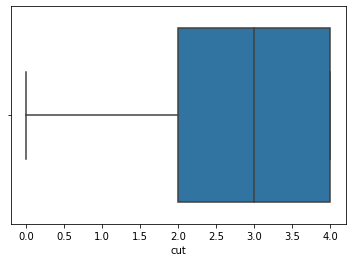

In [ ]:
sns.boxplot(df7['cut'])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = df7[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [ ]:
considered_features = ['carat', 'color', 'clarity', 'depth', 'table','x','y','z']


# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Variable,VIF
5,x,414.019682
6,y,395.374341
7,z,234.840225
0,carat,32.882125
3,depth,4.244616
2,clarity,1.232863
4,table,1.173632
1,color,1.119820


In [ ]:
considered_features.remove('x')
compute_vif(considered_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Variable,VIF
0,carat,31.821065
1,color,1.119780
2,clarity,1.219769
3,depth,3.862294
4,table,1.159677
5,y,206.622532
6,z,204.173026


In [ ]:
considered_features.remove('y')
compute_vif(considered_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Variable,VIF
0,color,1.107827
1,clarity,1.212478
2,depth,3.860775
3,table,1.153194
4,y,196.483613
5,z,198.582267


In [ ]:
considered_features.remove('z')
compute_vif(considered_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Variable,VIF
0,color,1.107659
1,clarity,1.210226
2,depth,1.112524
3,table,1.152662
4,y,1.305876


In [ ]:
df_fs = df7.drop(['x','z','y'], axis = 1)

In [ ]:
df_fs.head(1)

,cut,color,clarity,depth,table,y,price
0,4,1,5,62.1,58.0,4.29,499


In [ ]:
X= df_fs.drop('price', axis=1)
y= df_fs[['price']]

In [ ]:
X_trfs, X_tefs,y_trfs, y_test= train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
vfm = LinearRegression()
vfm.fit(X_train, y_train)

LinearRegression()

In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [ ]:
for idx, col_name in enumerate(X_trfs.columns):
    print("The coefficient for {} is {}".format(col_name, vfm.coef_[0][idx]))

NameError: ignored

In [ ]:
intercept = vfm.intercept_[0]

print("The intercept for our model is {}".format(intercept))

In [ ]:
vfm.score(X_Test, y_test)

In [ ]:
dt= pd.concat([X_Train, y_train], axis=1)
dt.head()

In [ ]:
lmn = smf.ols(formula= 'price ~ cut + color + clarity + depth + table + y ' , data = dt).fit()
lmn.params

In [ ]:
print(lmn.summary())

In [ ]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
math.sqrt(mse)

In [ ]:
#MODEL 6 Outlier Treatment+VIF+ Scaled Data
X_train_scaled1  = X_train.apply(zscore)
X_test_scaled1= X_test.apply(zscore)
y_train_scaled1 = y_train.apply(zscore)
y_test_scaled1 = y_test.apply(zscore)

In [ ]:
rmodel = LinearRegression()
rmodel.fit(X_train_scaled1, y_train_scaled1)

In [ ]:
rmodel.score(X_test_scaled1, y_test_scaled1)

In [ ]:
dt8= pd.concat([X_train_scaled1, y_train_scaled1], axis=1)
dt8.head()

In [ ]:
lmo = smf.ols(formula= 'price ~ cut + color + clarity + depth + table + y ' , data = dt8).fit()
print(lmo.summary())

In [ ]:

mse = np.mean((rmodel.predict(X_test_scaled1)-y_test_scaled)**2)
math.sqrt(mse)